In [62]:
%matplotlib inline

import corpusToDict as ctd
from nltk.tokenize import word_tokenize
from nltk import ngrams, FreqDist
import matplotlib.pyplot as plt

read the dataset here:

In [35]:
# path to the corpus:
filePath = "./Corpus.csv"

corpus = ctd.getCorpus(filePath)

In [52]:
# find the vocabulary of the corpus, and a large combined string of all the text:
vocabulary = set()
data = ""

for i in range(1, len(corpus)):
    text = corpus[i][0]
    data += text
    tokens = word_tokenize(text)
    
    vocabulary.update(tokens)
    

Perform some basic analysis on the vocablualry now


In [50]:
print(len(vocabulary))

38787


Plot and print the 3 most frequent N-gram sequences of len 2, 3, 4, 5

In [58]:
allCounts = {}

for size in range(2, 6):
    allCounts[size] = FreqDist(ngrams(data, size))
    

PLotting for ngrmas of desired size 

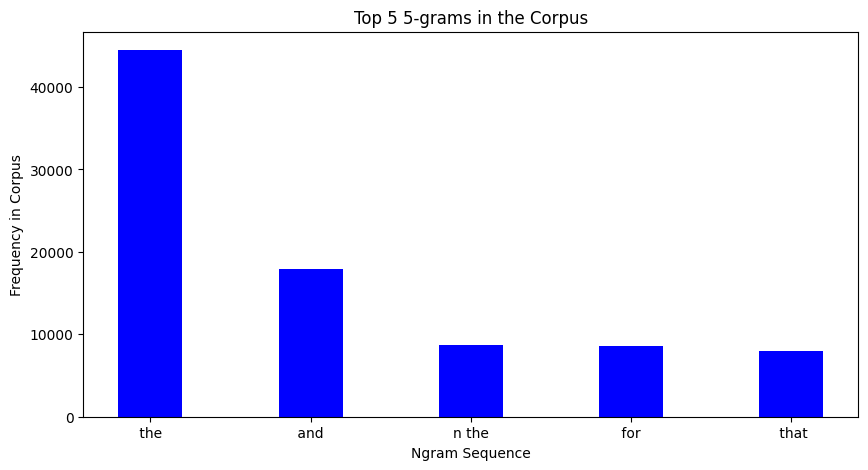

In [70]:
size = 5

grams = allCounts[size].most_common(5)
sequences = []
values = []

# getting the n-gram values and their respective frequencies in their respective lists to plot them:
for pairs in grams:
    
    string = ""
    for chars in pairs[0]:
        string += chars
    sequences.append(string)
    
    values.append(pairs[1])

fig = plt.figure(figsize=(10, 5))

# creating a bar plot
plt.bar(sequences, values, color="blue", width=0.4)

plt.xlabel("Ngram Sequence")
plt.ylabel("Frequency in Corpus")
plt.title(f"Top 5 {size}-grams in the Corpus")

plt.show()